Training AI model...

Adding predictions to blockchain...

-----------------------
 AI MODEL PERFORMANCE
-----------------------
Accuracy:  97.37%
Precision: 97.22%
Recall:    98.59%
F1 Score:  97.90%


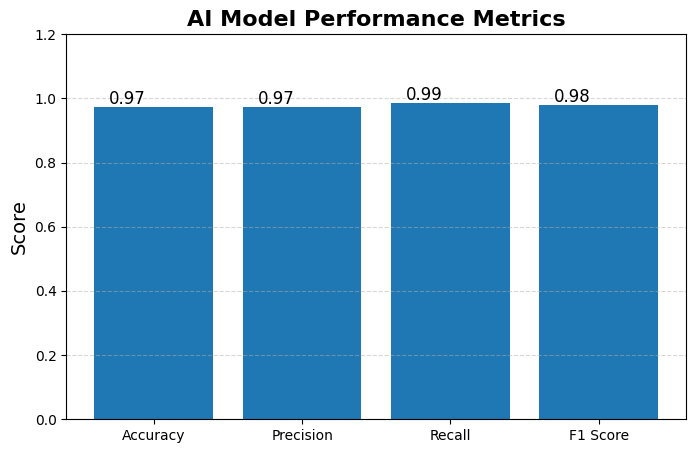


-----------------------
 BLOCKCHAIN INTEGRITY CHECK
-----------------------
Blockchain valid? True

Total Blocks Stored on Blockchain: 115


In [5]:
import hashlib
import json
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# ---------------------------------------------------------
# 1. Blockchain Implementation
# ---------------------------------------------------------
class Block:
    def __init__(self, index, timestamp, patient_id, true_label, predicted_label, previous_hash=""):
        self.index = index
        self.timestamp = timestamp
        self.patient_id = patient_id
        self.true_label = true_label
        self.predicted_label = predicted_label
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = json.dumps({
            "index": self.index,
            "timestamp": self.timestamp,
            "patient_id": self.patient_id,
            "true_label": self.true_label,
            "predicted_label": self.predicted_label,
            "previous_hash": self.previous_hash
        }, sort_keys=True).encode()

        return hashlib.sha256(block_string).hexdigest()


class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, time.time(), "None", "None", "None", "0")

    def get_last_block(self):
        return self.chain[-1]

    def add_block(self, patient_id, true_label, predicted_label):
        last_block = self.get_last_block()
        new_block = Block(
            index=len(self.chain),
            timestamp=time.time(),
            patient_id=patient_id,
            true_label=true_label,
            predicted_label=predicted_label,
            previous_hash=last_block.hash
        )
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            previous = self.chain[i - 1]
            current = self.chain[i]

            if current.hash != current.calculate_hash():
                print("❌ Block hash mismatch! Data tampering detected.")
                return False

            if current.previous_hash != previous.hash:
                print("❌ Previous hash mismatch! Chain broken.")
                return False

        return True


# ---------------------------------------------------------
# 2. AI Diagnostic Model
# ---------------------------------------------------------
def train_ai_model():
    data = load_breast_cancer()
    X, y = data.data, data.target

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    return model, X_test, y_test


# ---------------------------------------------------------
# 3. Evaluation + Graph Plot
# ---------------------------------------------------------
def evaluate_system(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print("\n-----------------------")
    print(" AI MODEL PERFORMANCE")
    print("-----------------------")
    print(f"Accuracy:  {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall:    {recall * 100:.2f}%")
    print(f"F1 Score:  {f1 * 100:.2f}%")

    # -----------------------------
    # Graph for Visual Performance
    # -----------------------------
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(metrics, values)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + 0.1, yval + 0.01, f"{yval:.2f}", fontsize=12)

    plt.ylim(0, 1.2)
    plt.title("AI Model Performance Metrics", fontsize=16, fontweight='bold')
    plt.ylabel("Score", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    return accuracy, precision, recall, f1


# ---------------------------------------------------------
# 4. Main Simulation Pipeline
# ---------------------------------------------------------
def main():
    print("Training AI model...")
    model, X_test, y_test = train_ai_model()

    blockchain = Blockchain()
    predictions = []

    print("\nAdding predictions to blockchain...")

    for i in range(len(X_test)):
        predicted = model.predict([X_test[i]])[0]
        predictions.append(predicted)

        blockchain.add_block(
            patient_id=i,
            true_label=int(y_test[i]),
            predicted_label=int(predicted)
        )

    # Evaluate and show graph
    evaluate_system(y_test, predictions)

    print("\n-----------------------")
    print(" BLOCKCHAIN INTEGRITY CHECK")
    print("-----------------------")
    print("Blockchain valid?", blockchain.is_chain_valid())

    print("\nTotal Blocks Stored on Blockchain:", len(blockchain.chain))


main()
